In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%run read&clean.ipynb
%run Jean.ipynb

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.2847415955845462
0.25


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_correlation = ['fold','agePct12t29', 'agePct65up', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'perCapInc', 'whitePerCap', 'blackPerCap','indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctImmigRecent', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig10', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'NumInShelters', 'NumStreet', 'PctUnemployed', 'NumUnderPov', 'PctPopUnderPov', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'TotalPctDiv','medIncome', 'pctWWage', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'MedYrHousBuilt', 'MedRent', 'MedRentPctHousInc', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
correlation_df = pd.DataFrame()
df_clean_columns = data_clean.columns

for i in range(0, len(list_correlation)):
    if list_correlation[i] not in df_clean_columns:
        list_correlation.remove(df_clean_columns[i])
correlation_df = df_clean[list_correlation]

for j in range (0, len(list_correlation)):
    if type(correlation_df[list_correlation[j]][1]) is not float:
        print(list_correlation[j])
        

correlation_df_fold_1 = correlation_df[correlation_df['fold']==1]
correlation_df_fold_1 = correlation_df_fold_1.drop(columns = 'fold')
correlation_df_fold_1 = correlation_df_fold_1.astype(float).corr()

correlation_df_fold_2 = correlation_df[correlation_df['fold']==2]
correlation_df_fold_2 = correlation_df_fold_2.drop(columns = 'fold')
correlation_df_fold_2 = correlation_df_fold_2.astype(float)

df_fold_3 = correlation_df[correlation_df['fold']==3]
df_fold_3 = df_fold_3.drop(columns = 'fold')

#Simple heatmap

sns.heatmap(correlation_df_fold_2, cmap = 'GnBu')
plt.show()

#Heatmap of correlation coefficient 
sns.heatmap(correlation_df_fold_1, cmap = 'GnBu')
plt.show()

#Identify higher correlation coefficent

columns = correlation_df_fold_1.columns
for i in range (0, len(columns)):
    for j in range(0, len(correlation_df_fold_1)):
        if (correlation_df_fold_1[columns[i]][j] > 0.8) & (correlation_df_fold_1[columns[i]][j] != 1):
            print(columns[i], columns[j])

ValueError: list.remove(x): x not in list

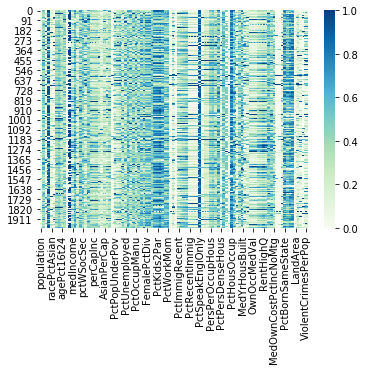

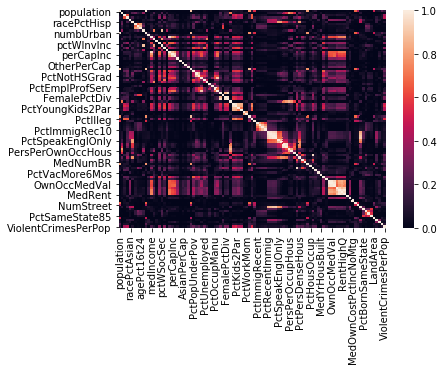

Determination coefficient between 0.7 and 0.8 population NumIlleg 0.783540573041492
Determination coefficient between 0.7 and 0.8 householdsize PersPerFam 0.7143637379894577
Determination coefficient between 0.7 and 0.8 householdsize PersPerOccupHous 0.7970307533036676
Determination coefficient between 0.7 and 0.8 racePctHisp PctSpeakEnglOnly 0.7931997591770562
Determination coefficient between 0.7 and 0.8 racePctHisp PctNotSpeakEnglWell 0.7963881223962999
Determination coefficient between 0.7 and 0.8 racePctHisp PctPersDenseHous 0.772456054528342
Determination coefficient between 0.7 and 0.8 agePct65up pctWWage 0.7032533655905377
Determination coefficient between 0.7 and 0.8 numbUrban NumIlleg 0.7686334690627957
Determination coefficient between 0.7 and 0.8 numbUrban HousVacant 0.7880850218105938
Determination coefficient between 0.7 and 0.8 medIncome perCapInc 0.7997921420566793
Determination coefficient between 0.7 and 0.8 medIncome whitePerCap 0.7051375321911892
Determination coeff

In [25]:
#df_clean = df_clean.drop(columns = 'fold')
#df_clean = df_clean.drop(columns = 'state')
#df_clean = df_clean.drop(columns = 'communityname')

data_clean = data_clean.astype(float)

#Simple heatmap
sns.heatmap(data_clean, cmap = 'GnBu')
plt.show()

#Correlation heatmap 
sns.heatmap(data_clean.astype(float).corr()**2)
plt.show()


df_clean_correlation = data_clean.astype(float).corr()**2
columns_df_clean = df_clean_correlation.columns
determination_coefficient_first = ''
determination_coefficient_second = ''
determination_coefficient_third = ''


for i in range (0, len(columns_df_clean)):
    for j in range(0, len(df_clean_correlation)):
        if (df_clean_correlation[columns_df_clean[i]][j] > 0.7) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.8):
            determination_coefficient_first+=('Determination coefficient between 0.7 and 0.8 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+ ' '+str(df_clean_correlation[columns_df_clean[i]][j])+ '\n')
        
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.8) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.9):
            determination_coefficient_second+=('Determination coefficient between 0.8 and 0.9 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
            
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.9) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.95):
            determination_coefficient_third+=('Determination coefficient between 0.9 and 0.95 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
            
#print(determination_coefficient_first)
#print(determination_coefficient_second)
#print(determination_coefficient_third)

edouard_text = determination_coefficient_first+determination_coefficient_second+determination_coefficient_third
print(edouard_text)

In [15]:
corrT = data_clean.astype(float).corr()
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.738550
PctFam2Par            -0.706857
racePctWhite          -0.684576
PctYoungKids2Par      -0.666184
PctTeen2Par           -0.661809
pctWInvInc            -0.576035
PctPersOwnOccup       -0.525398
PctHousOwnOcc         -0.470657
medFamInc             -0.439186
medIncome             -0.424436
MedNumBR              -0.356975
perCapInc             -0.351909
PctOccupMgmtProf      -0.338737
PctEmploy             -0.331986
PctHousOccup          -0.319326
PctBSorMore           -0.314331
pctWWage              -0.306141
blackPerCap           -0.275556
RentLowQ              -0.252425
HispPerCap            -0.244362
RentMedian            -0.240986
PctSpeakEnglOnly      -0.240752
MedRent               -0.240342
RentHighQ             -0.232779
OwnOccLowQuart        -0.210813
whitePerCap           -0.209095
OwnOccMedVal          -0.190977
OwnOccHiQuart         -0.172284
AsianPerCap           -0.155497
PctSameHouse85        -0.154914
                         ...   
PctLargH

In [33]:
data_clean_complete = data_clean
first_quartile = 0.07
median = 0.15
third_quartile = 0.33

data_clean_complete['ViolentCrimesPerPopLevel'] = None

for i in range (0, len(data_clean_complete)):
    if data_clean_complete['ViolentCrimesPerPop'][i] <= first_quartile :
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Low'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > first_quartile) & (data_clean_complete['ViolentCrimesPerPop'][i] <= median):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Medium Low'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > median) & (data_clean_complete['ViolentCrimesPerPop'][i] <= third_quartile):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Medium High'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > third_quartile):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'High'

count    1993.000000
mean        0.237858
std         0.232980
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64


/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_lau

In [36]:
data_clean_complete.drop(columns = ['ViolentCrimesPerPop'])

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPopLevel
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,Medium High
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,High
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,High
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,Medium Low
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,Low
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,Medium Low
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,Low
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00,High
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00,High
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,Medium Low


In [21]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
principalComponents = mds.fit_transform(data_clean_complete)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

composants = ['NumIlleg', 'PctHousLess3BR', 'PctNotHSGrad', 'PctVacantBoarded', 'PctHousNoPhone', 'PctUnemployed', 'PctPopUnderPov', 'MalePctDivorce', 'TotalPctDiv', 'FemalePctDiv', 'pctWPubAsst', 'racepctblack', 'PctIlleg']

In [24]:
target = data_clean_complete['ViolentCrimesPerPopLevel']
data_clean['ViolentCrimesPerPop'] = target
finalDf = pd.concat([principalDf, target], axis = 1)
print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('MDS', fontsize = 20)
#targets = ['t', 'n']
#colors = ['y', 'b']
#for target, color in zip(targets):
#    indicesToKeep = finalDf['target'] == target
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , s = 50)
#    ax.legend(targets)
#    ax.grid()

      principal component 1  principal component 2                 0
0                  0.283286               0.213786          NumIlleg
1                  0.696361              -1.032952    PctHousLess3BR
2                 -1.019966              -0.235324      PctNotHSGrad
3                  2.055274               0.150161  PctVacantBoarded
4                  0.137917               1.612308    PctHousNoPhone
5                  2.635062               0.167559     PctUnemployed
6                 -0.115717               1.371184    PctPopUnderPov
7                  0.177369              -3.098348    MalePctDivorce
8                 -1.158837              -0.297273       TotalPctDiv
9                  2.399346               0.794335      FemalePctDiv
10                 3.072593              -1.448344       pctWPubAsst
11                 1.543466               1.797684      racepctblack
12                 1.601270               1.810664          PctIlleg
13                -0.119934       

In [22]:
print(principalDf)

      principal component 1  principal component 2
0                  0.283286               0.213786
1                  0.696361              -1.032952
2                 -1.019966              -0.235324
3                  2.055274               0.150161
4                  0.137917               1.612308
5                  2.635062               0.167559
6                 -0.115717               1.371184
7                  0.177369              -3.098348
8                 -1.158837              -0.297273
9                  2.399346               0.794335
10                 3.072593              -1.448344
11                 1.543466               1.797684
12                 1.601270               1.810664
13                -0.119934               1.520856
14                 2.528733               0.250435
15                -1.528283               0.600433
16                -0.010538              -1.890972
17                 1.294647               1.698295
18                -0.756622    

In [20]:
#from sklearn.manifold import LocallyLinearEmbedding

#numberOfNeighbors = [3, 5, 8, 10, 12, 15]

#composants = ['NumIlleg', 'PctHousLess3BR', 'PctNotHSGrad', 'PctVacantBoarded', 'PctHousNoPhone', 'PctUnemployed', 'PctPopUnderPov', 'MalePctDivorce', 'TotalPctDiv', 'FemalePctDiv', 'pctWPubAsst', 'racepctblack', 'PctIlleg']

#for i in range(0, len(numberOfNeighbors)):
   # lle = LocallyLinearEmbedding(n_components=2, n_neighbors=numberOfNeighbors[i])
    #principalComponents = lle.fit_transform(data_clean)
    #principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    #print(principalDf)
   # target = composants
    #principalDf['target'] = target
   # finalDf = pd.concat([principalDf, target], axis = 1
    #fig = plt.figure(figsize=(8, 8))
   # ax = fig.add_subplot(1, 1, 1)
    #ax.set_xlabel('Principal Component 1', fontsize=15)
    #ax.set_ylabel('Principal Component 2', fontsize=15)
    #title = 'LocallyLinearEmbedding, number of neighbors = '+ str(numberOfNeighbors[i])
    #ax.set_title(title, fontsize=20)
    #targets = ['t', 'n']
    #colors = ['y', 'b']
    #for target, color in zip(targets, colors):
      #indicesToKeep = finalDf['target'] == target
         #ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   # , finalDf.loc[indicesToKeep, 'principal component 2']
                    #, c=color
                    #, s=50)
         #ax.legend(targets)
         #ax.grid()

         #plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_fold_3)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
target = df_fold_3.columns
finalDf = pd.concat([principalDf, pd.DataFrame(target)], axis=1)
finalDf['target'] = finalDf[finalDf.columns[2]]
finalDf = finalDf.drop(finalDf.columns[2],axis=1)
print(finalDf)

     principal component 1  principal component 2               target
0                 0.485653              -0.518277          agePct12t29
1                 1.039866              -0.115782           agePct65up
2                 0.354473              -0.510943       PctForeignBorn
3                 0.891906               0.657951     PctBornSameState
4                 0.739834               0.568988       PctSameHouse85
5                 1.122907               0.615663        PctSameCity85
6                -0.184252              -0.291936       PctSameState85
7                 0.787629              -0.080296            perCapInc
8                 0.690920              -0.446963          whitePerCap
9                -0.525485               0.745233          blackPerCap
10                1.504280              -0.086121         indianPerCap
11                0.303574               0.158868          AsianPerCap
12                0.046127              -0.595083           HispPerCap
13    